In [1]:
import tensorflow as tf
mnist  = tf.keras.datasets.mnist

D:\anaconda_navi\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda_navi\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda_navi\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda_navi\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: P

In [2]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout

Using TensorFlow backend.


In [6]:
# deviding the data into train and test

(trainx,trainy),(testx,testy) = mnist.load_data()

In [7]:
# normalising the pixel values

trainx ,testx = trainx/255.0 ,testx/255.0


In [24]:
# Initiating the model

classifier = Sequential()

# Flattening 
classifier.add(Flatten(input_shape = (28,28)))

# Adding the layers
classifier.add(Dense(units =50,input_dim=784,activation="relu"))
classifier.add(Dropout(0.2))

classifier.add(Dense(units =50,activation="relu"))
classifier.add(Dropout(0.2))

classifier.add(Dense(units =350,activation="relu"))
classifier.add(Dropout(0.2))

classifier.add(Dense(units =650,activation="relu"))
classifier.add(Dropout(0.2))

classifier.add(Dense(units =10,activation="softmax"))

# compiling
classifier.compile(loss ="sparse_categorical_crossentropy",optimizer ="adam",metrics=["accuracy"])


# Fitting
classifier.fit(trainx,trainy,epochs =8)

pred = classifier.predict(testx)

# evaluating the model
classifier.evaluate(testx,testy)

Epoch 1/8
60000/60000 [==============================] - 10s 174us/step - loss: 0.4458 - accuracy: 0.8640
Epoch 2/8
60000/60000 [==============================] - 10s 172us/step - loss: 0.2605 - accuracy: 0.9250
Epoch 3/8
60000/60000 [==============================] - 10s 167us/step - loss: 0.2233 - accuracy: 0.9347
Epoch 4/8
60000/60000 [==============================] - 10s 172us/step - loss: 0.2030 - accuracy: 0.9406
Epoch 5/8
60000/60000 [==============================] - 10s 169us/step - loss: 0.1881 - accuracy: 0.9456
Epoch 6/8
60000/60000 [==============================] - 10s 167us/step - loss: 0.1796 - accuracy: 0.9477
Epoch 7/8
60000/60000 [==============================] - 10s 167us/step - loss: 0.1658 - accuracy: 0.9515
Epoch 8/8
10000/10000 [==============================] - 0s 46us/step


[0.11657866059262305, 0.9678000211715698]

In [25]:
sess =tf.Session()
result = sess.run(tf.argmax(pred,1))
result

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(result,testy)

0.9678

In [27]:
# Inference

test_img = testx[2516].reshape(1,28,28)
import matplotlib.pyplot as plt

9


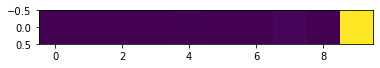

In [28]:
# Result after Predicting :
res = classifier.predict(test_img)
print(res.argmax())
plt.imshow(res)

In [29]:
testy[2516]

9